In [76]:
import os
import tensorflow as tf
import numpy as np
import platform
import pathlib

from absl import logging
from matplotlib import pyplot as plt
from nets import mobilenet_v2 as mobilenet

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Python version: 3.9.5
Tensorflow version: 2.5.0
Keras version: 2.5.0


In [13]:
workspace_path = os.environ["WORKSPACE"] if "WORKSPACE" in os.environ else "/Volumes/Data/tmp"
data_path = os.environ["DATA_DIR"] if "DATA_DIR" in os.environ else "/Users/watcharinsarachai/Documents/_datasets/flowers17_data/jpg"
data_dir = os.path.join(data_path, "orchids52_data")

In [14]:
LABELS_URL = 'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt'
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt', LABELS_URL)
labels = np.array(
    open(labels_path).read().splitlines()
)[1:]

In [15]:
def load_image(image_path):
    return tf.keras.preprocessing.image.load_img(
        image_path,
        target_size=[INPUT_IMAGE_SIZE, INPUT_IMAGE_SIZE]
    )

In [16]:
def image_to_array(image):
    return tf.keras.preprocessing.image.img_to_array(image, dtype=np.int32)

In [17]:
def display_image(image_np):
    plt.figure()
    plt.imshow(image_np)

In [18]:
base_model = mobilenet.create_mobilenet_v2(input_shape=mobilenet.IMG_SHAPE_224, alpha=1.4, include_top=True, weights="imagenet", sub_name="01")

In [19]:
TEST_IMAGES_DIR_PATH = pathlib.Path(data_path)
TEST_IMAGE_PATHS = sorted(list(TEST_IMAGES_DIR_PATH.glob('*.jpg')))
INPUT_IMAGE_SIZE = 224

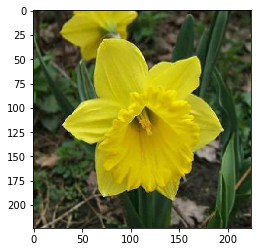

In [50]:
test_images = []
image_path = TEST_IMAGE_PATHS[7]
# <PIL.Image.Image image mode=RGB size=224x224 at 0x141247ED0>
test_image = load_image(image_path)
test_image_array = image_to_array(test_image)
#test_images.append(test_image_array)
display_image(test_image_array)

In [89]:
def image_preprocess(image_array):
    return tf.keras.applications.mobilenet_v2.preprocess_input(
        image_array[tf.newaxis, ...]
    )

In [90]:
test_images_preprocessed = []
for test_image in test_images:
    test_image_preprocessed = image_preprocess(test_image)
    test_images_preprocessed.append(test_image_preprocessed)

In [91]:
print('Image shape before preprocessing:', test_images[0].shape)
print('Image shape after preprocessing:', test_images_preprocessed[0].shape)

Image shape before preprocessing: (224, 224, 3)
Image shape after preprocessing: (1, 224, 224, 3)


In [92]:
def get_tags(probs, labels, max_classes = 5, prob_threshold = 0.01):
    probs_mask = probs > prob_threshold
    probs_filtered = probs[probs_mask] * 100
    probs_filtered = tf.squeeze(probs_filtered)
    probs_mask = tf.squeeze(probs_mask)
    labels_filtered = labels[probs_mask]
    
    sorted_index = np.flip(np.argsort(probs_filtered))
    labels_filtered = labels_filtered[sorted_index][:max_classes]
    #probs_filtered = probs_filtered[sorted_index][:max_classes].astype(np.int)
    
    tags = ''
    for i in range(0, len(labels_filtered)):
        tags = tags + labels_filtered[i] + ' (' + str(probs_filtered[i]) + '%), ' 

    return tags, labels_filtered, probs_filtered

In [93]:
TEST_IMAGE_INDEX = 0
np_result = base_model(test_images_preprocessed[TEST_IMAGE_INDEX])

In [94]:
tags, labels_filtered, probs_filtered = get_tags(np_result, labels)

print('probs_filtered:', probs_filtered)
print('labels_filtered:', labels_filtered)
print('tags:', tags)

probs_filtered: tf.Tensor([51.005726   1.5140419 31.287659 ], shape=(3,), dtype=float32)
labels_filtered: ['tusker' 'African elephant' 'Indian elephant']
tags: tusker (tf.Tensor(51.005726, shape=(), dtype=float32)%), African elephant (tf.Tensor(1.5140419, shape=(), dtype=float32)%), Indian elephant (tf.Tensor(31.287659, shape=(), dtype=float32)%), 


In [84]:
logging.warning("test%d%s", 1, "xxx")

In [66]:
sorted_index

array([0, 2, 1])